# Анализ объявлений о продаже квартир

Вы располагаете архивом объявлений о продаже квартир в Санкт-Петербурге и окрестностях, предоставленным сервисом Яндекс Недвижимость за несколько лет. Ваша задача — научиться определять рыночную стоимость объектов недвижимости.

Для каждой квартиры доступны два типа данных: введённые пользователем и автоматически собранные на основе картографической информации. Например, расстояние до центра города, аэропорта и других объектов определяется с помощью геосервисов, а количество парков и водоёмов также заполняется автоматически без участия пользователя.

### Откройте файл с данными и изучите общую информацию

Загрузите данные из csv-файла в датафрейм c помощью библиотеки pandas.
Изучите общую информацию о полученном датафрейме.
Постройте гистограмму для всех числовых столбцов таблицы на одном графике. Например, для датафрейма data можно построить такую гистограмму командой data.hist(figsize=(15, 20)). Напомним, что параметр figsize задаёт размер графика.

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [5]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

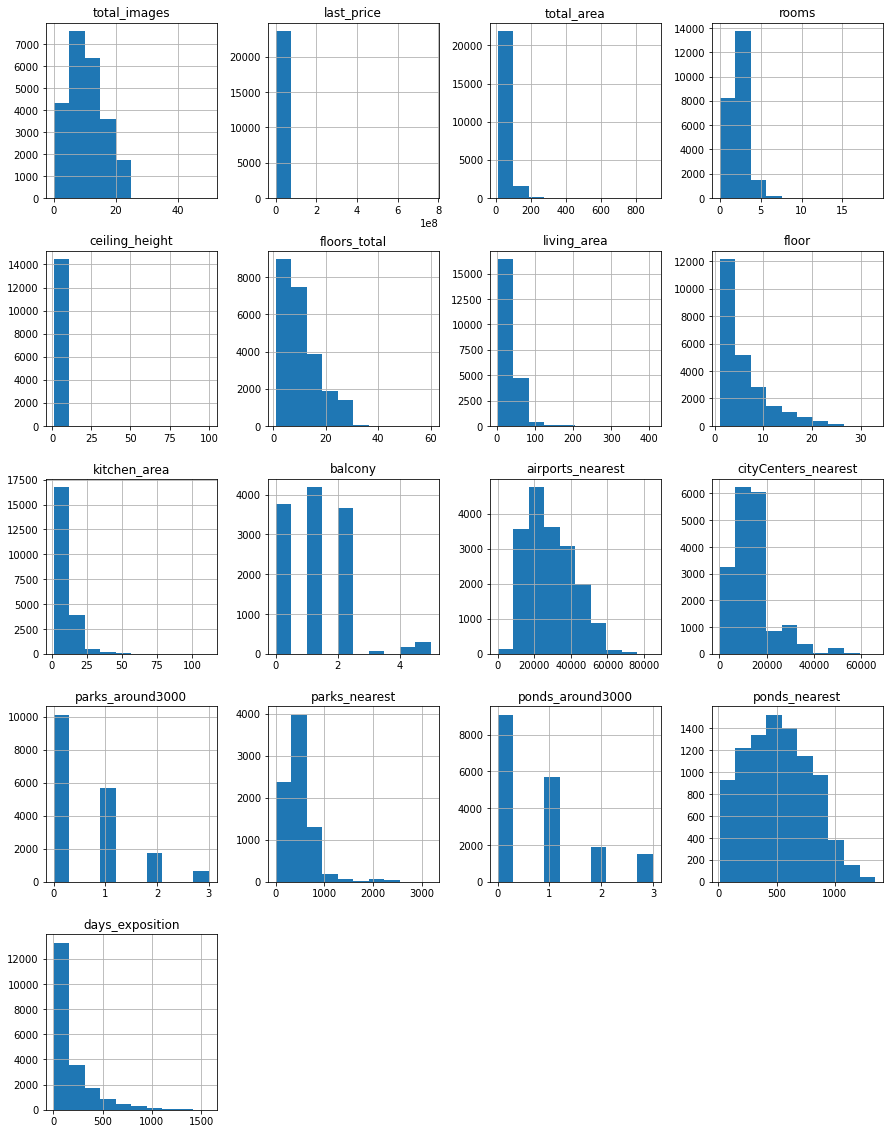

In [6]:
data.hist(figsize=(15, 20));

Данные сервиса Яндекс.Недвижимость представляют собой 22 параметра, три из которых имеют тип объект, два - булевы значения, 3 целочисленных и 14 - значения с плавающей точкой.

Часть параметров имеет пустые значения, это представлено выше.

### Выполните предобработку данных

Еще раз рассмотрим данные с пропущенными значениями и постараемся заполнить имеющиеся пропуски

In [7]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Проведем поиск дубликатов в наших данных

In [8]:
data.duplicated().sum()

0

Рассмотрим долю пропусков, чтобы понять, какое количество от общего количества данных они занимают

In [9]:
pd.DataFrame(round(data.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,38.800000
floors_total,0.400000
living_area,8.000000
floor,0.000000
is_apartment,88.300000


Обработаем данные о количестве балконов в параметре `balcony` - количество балконов не может быть дробным, поэтому сменим тип данных на целочисленный и заменим пропуски на нулевое количество балконов - пользователь скорее не указал их из-за отсутствия балкона в квартире

In [10]:
data['balcony'] = data['balcony'].fillna(value=0)
data['balcony'] = data['balcony'].astype(int)

In [11]:
data['balcony'].unique()

array([0, 2, 1, 5, 4, 3])

Количество парков и водоемов заполняется автоматически из геосервисов. Проверим, какие значения есть в данных параметрах и заполним пропуски нулями - отсутвие водоемов и парков в пределе 3 километров.

In [12]:
data['parks_around3000'].unique()

array([ 1.,  0.,  2., nan,  3.])

In [13]:
data['ponds_around3000'].unique()

array([ 2.,  0.,  3.,  1., nan])

Заполним пропуски нулями для параметров `parks_around3000`, `ponds_around3000` и сменим тип данных на целочисленное количество

In [14]:
data[['parks_around3000', 'ponds_around3000']] = data[['parks_around3000', 'ponds_around3000']].fillna(0)

In [15]:
data[['parks_around3000', 'ponds_around3000']] = data[['parks_around3000', 'ponds_around3000']].astype(int)

In [16]:
data['ponds_around3000'].unique()

array([2, 0, 3, 1])

In [17]:
data['parks_around3000'].unique()

array([1, 0, 2, 3])

Параметры количества ближайшего водоема/парка связаны между собой. Убедимся в этом, посмотрев на срез датафрейма по количеству парков/водоемов и расстояния до ближайшего

In [18]:
data[['parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest']].head(20)

,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest
0,1,482.0,2,755.0
1,0,NaN,0,NaN
2,1,90.0,2,574.0
3,2,84.0,3,234.0
4,2,112.0,1,48.0
5,0,NaN,0,NaN
6,0,NaN,0,NaN
7,0,NaN,0,NaN
8,0,NaN,0,NaN
9,0,NaN,0,NaN


При отсутствии парка или водоема в пределах трех километров, расстояние до него заполнено значением NaN. Заполним датафрейм нулями для параметров `parks_nearest` и `ponds_nearest`, если по близости нет данных объектов

In [19]:
data.loc[(data['parks_nearest'].isna()) & (data['parks_around3000'] == 0), 'parks_nearest'] = 0

In [20]:
data.loc[(data['ponds_nearest'].isna()) & (data['ponds_around3000'] == 0), 'ponds_nearest'] = 0

При детальном рассмотрении параметра `is_apartment` мы обнаруживаем, что в датафрейме указан неверный тип - object. Необходимо заменить на булевы, поскольку это логических тип данных - недвижимость либо является квартирой, либо нет

In [21]:
data['is_apartment'] = data['is_apartment'].astype(bool)

In [22]:
data['is_apartment'].unique()

array([ True, False])

Предположим, что параметр `is_apartment` является незаполненным, если пользователь не решил отмечать отдельно, что это апартаменты. Заполним пропуски значением False

In [23]:
data.query('is_apartment.isna()')['is_apartment'] = False

Заменим тип данных в `floors_total` на целочисленный, так как количество этажей не может быть дробным

In [24]:
data['floors_total'] = data['floors_total'].astype('Int64')

Избавимся от дупликатов для `locality_name`

In [25]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [26]:
data['locality_name'].nunique()

364

In [27]:
data['local_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(['поселок городского типа ', 'городской поселок ', 'поселок ', 'станции ', 'село ', 'садовое товарищество ',
              'садоводческое некоммерческое товарищество ', 'деревня ', 'при железнодорожной ', 'коттеджный '], '', regex=True)
) 

In [28]:
data['local_name'].nunique()

305

Поскольку тип пропуска для `airports_nearest` и `cityCenters_nearest` больше похож на MNAR пропуск, то оставим данные незаполненными

In [29]:
data[['local_name', 'airports_nearest', 'cityCenters_nearest']].query('airports_nearest.isna() or cityCenters_nearest.isna()')

,local_name,airports_nearest,cityCenters_nearest
5,Янино-1,NaN,NaN
8,Мурино,NaN,NaN
12,Сертолово,NaN,NaN
22,Кудрово,NaN,NaN
30,Коммунар,NaN,NaN
...,...,...,...
23683,Дзержинского,NaN,NaN
23692,Тихвин,NaN,NaN
23695,Тосно,NaN,NaN
23696,Рождествено,NaN,NaN


Заполним пропуски для `airports_nearest` и `cityCenters_nearest` медианным значением для населенного пункта
data = data.merge(data.pivot_table(index='local_name', values=['airports_nearest', 'cityCenters_nearest'], aggfunc='median'),
                  how='left', on='local_name', suffixes=('', '_median'))

data['airports_nearest'].fillna(data['airports_nearest_median'], inplace=True)
data['cityCenters_nearest'].fillna(data['cityCenters_nearest_median'], inplace=True)

data.drop(['airports_nearest_median', 'cityCenters_nearest_median'], axis=1, inplace=True)

Поменяем из строки во время для столбца `first_day_exposition`

In [30]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

для удобства анализа добавим столбец стоимости квартиры в млн

In [31]:
data['price_mln'] = round((data['last_price'] / pow(10, 6)), 2)

Поскольку балкон не входит в общую площадь квартиры, мы можем примерно оценить жилую площадь и площадь кухни через общую площадь квартиры. В жилую площадь входят именно жилые комнаты, но кладовые и ванные не входят, однако общий вклад вносит кухня. Соответственно мы можем вывести примерную зависимость `total_area` = `living_area` - `kitchen_area`. Для студий `kitchen_area` = 0

In [32]:
data.loc[(data['studio']) & (data['kitchen_area'].isna()), 'kitchen_area'] = 0

In [33]:
data.loc[(data['living_area'].isna()) & (data['kitchen_area'].notna()), 
         'living_area'] = data['total_area'] - data['kitchen_area']

In [34]:
data.loc[(data['living_area'].notna()) & (data['kitchen_area'].isna()), 
        'kitchen_area'] = data['total_area'] - data['living_area']

Заполним пропуски в параметре `ceiling_height` на медианное значение по локации, поскольку логично предположить, что в одном и том же месте находятся дома с одинаковой высотой потолков

In [35]:
median_values_ceiling = (data[['ceiling_height', 'local_name']]
                      .pivot_table(index='local_name', values='ceiling_height', aggfunc='median')
)

In [36]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['local_name'].map(median_values_ceiling['ceiling_height']))

Параметр `days_exposition` является автоматически заполняемым, соответственно вероятно пропуски выполнены из-за все еще акуального объявления

Посмотрим еще раз на количество пропущенных значений

In [37]:
data.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height           130
floors_total              86
living_area             1454
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area            1454
balcony                    0
locality_name             49
airports_nearest        5542
cityCenters_nearest     5519
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         3181
local_name                49
price_mln                  0
dtype: int64

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23569 non-null  float64       
 6   floors_total          23613 non-null  Int64         
 7   living_area           22245 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          22245 non-null  float64       
 13  balcony         

 В результате предобработки в столбцах `balcony`, `parks_around3000`, `ponds_around3000`, `parks_nearest`, `ponds_nearest`, `is_apartment`, `living_area`, `kitchen_area`, `ceiling_height` были убраны все или часть пропусков.
 
 Для `floors_total` так же был изменен тип данных с дробного на целочисленный
 
 А для столбца `first_day_exposition` был произведен перевод из строки в дату и время
 
 Для столбца `locality_name` был создан столбец `local_name`, в котором были убраны дупликаты

### Добавьте в таблицу новые столбцы

Добавим колонку для расчета цены одного квадратного метра

In [39]:
data['price_metr'] = round(data['last_price'] / data['living_area'], 2)

Добавим колонку для дня недели публикации объявления

In [40]:
data['day'] = data['first_day_exposition'].dt.weekday

Добавим колонку с месяцем публикации объявления

In [41]:
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month

И добавим колонку с годом публикации

In [42]:
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year

In [43]:
def level(number, maximum):
    if number == 1:
        return 'первый'
    elif number == maximum:
        return 'последний'
    return 'другой'

In [44]:
data['level'] = data.query('floor.notna() and floors_total.notna()').apply(lambda x: level(x['floor'], x['floors_total']), axis=1)

Добавим колонку с расстоянием до центра города в километрах

In [45]:
data['city_center_km'] = round(data['cityCenters_nearest'].loc[data['cityCenters_nearest'].notna()] / 1000, 0)

In [46]:
data['city_center_km'] = data['city_center_km'].astype('Int64')

In [47]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,local_name,price_mln,price_metr,day,month,year,level,city_center_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,True,...,755.0,NaN,Санкт-Петербург,13.00,254901.96,3,3,2019,другой,16
1,7,3350000.0,40.4,2018-12-04,1,2.63,11,18.6,1,True,...,0.0,81.0,Шушары,3.35,180107.53,1,12,2018,первый,19
2,10,5196000.0,56.0,2015-08-20,2,2.70,5,34.3,4,True,...,574.0,558.0,Санкт-Петербург,5.20,151486.88,3,8,2015,другой,14
3,0,64900000.0,159.0,2015-07-24,3,2.70,14,NaN,9,True,...,234.0,424.0,Санкт-Петербург,64.90,NaN,4,7,2015,другой,7
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,True,...,48.0,121.0,Санкт-Петербург,10.00,312500.00,1,6,2018,другой,8


### Проведите исследовательский анализ данных

 **Список параметров:**
    
   - общей площади;
   `total_area`
   - жилой площади; 
   `living_area`
   - площади кухни; 
    `kitchen_area`
   - количества комнат; 
    `rooms`
   - этажа, на котором расположена квартира (первый, последний, другой); 
    `level`
   - даты размещения (день недели, месяц, год). 
    `days_exposition`
   - расстояние до центра города в метрах;
   `cityCenters_nearest`
   - расстояние до ближайшего парка
   `parks_nearest`

Поскольку мы хотим оценить, насколько зависят данные параметры, построим матрицу коррелляции для признаков и тем самым сразу сможем оценить, на каких параметрах есть аномальные или выбивающиеся значения

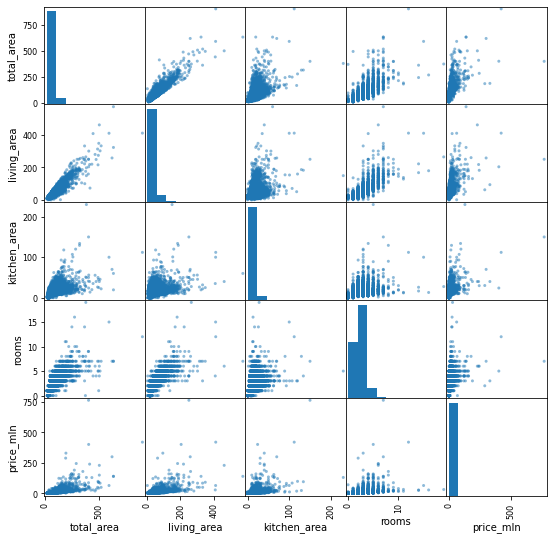

In [48]:
pd.plotting.scatter_matrix(data[['total_area', 'living_area', 'kitchen_area', 'rooms', 'price_mln']], figsize=(9, 9));

Подготовим функцию для построения диаграмм распределения для каждого интересующего нас параметра

In [49]:
def plot_hist(title, legend, bins=100):
    data[legend].plot(kind='hist', 
                        bins=100, 
                        legend=legend, 
                        grid=True, 
                        title=title,
                        figsize=(9, 5)
                       );

#### Общая площадь

Рассмотрим как выглядят значения в параметре общая площадь `total_area` и проанализируем выбивающиеся значения

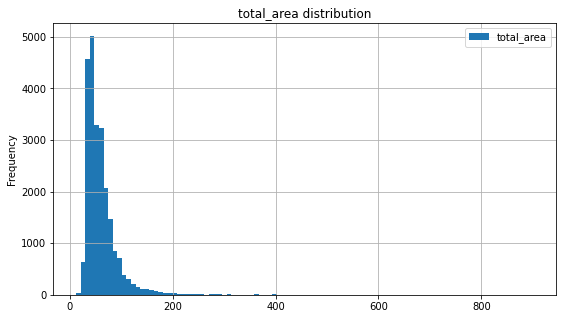

In [50]:
plot_hist(title='total_area distribution', legend='total_area')

При увеличении площади более 200 квадратных метров появляются единичные квартиры или участки. Рассмотрим подробнее участок от 0 до 200 квадратных метров

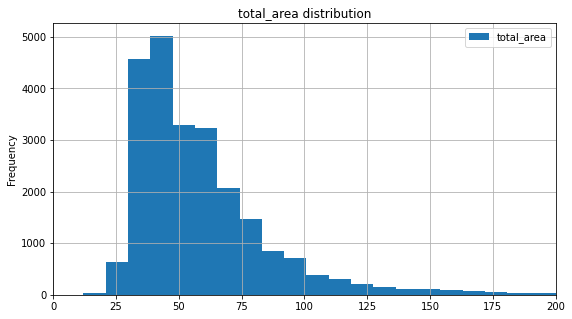

In [51]:
data['total_area'].plot(kind='hist', 
                  bins=100, 
                  legend='total_area', 
                  grid=True, 
                  title='total_area distribution',
                  figsize=(9, 5),
                  xlim=(0, 200)
                  );

Для определения зависимостей в ценообразовании квартир нам стоит избавится от единичных квартир с большой площадью, поскольку их площадь и цена скорее являются аномальными

In [52]:
data = data.query('total_area < 150')

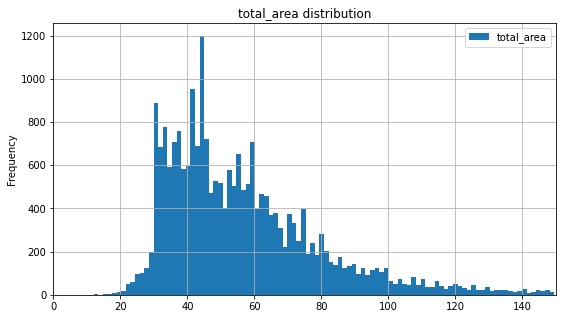

In [53]:
data['total_area'].plot(kind='hist', 
                  bins=100, 
                  legend='total_area', 
                  grid=True, 
                  title='total_area distribution',
                  figsize=(9, 5),
                  xlim=(0, 150)
                  );

#### Жилая площадь

Теперь рассмотрим значения для параметра жилая площадь `living_area`

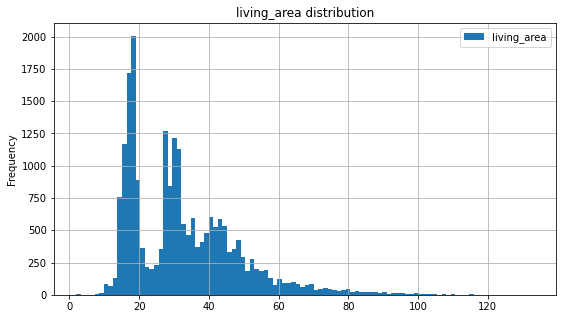

In [54]:
plot_hist(title='living_area distribution', legend='living_area')

Видно два пика числа квартир при примерно 20 и 30 квадратных метрах жилого пространства. Посмотрим зависимость жилой площади от общей площади квартиры при is_apartment True

In [55]:
def table_of_total_area(value, title):
    data.query('is_apartment').pivot_table(index=value, values='total_area').plot(grid=True,
                                                                                  figsize=(12, 5),
                                                                                  style='o',
                                                                                  title=title, 
                                                                                  ylabel='total_area')

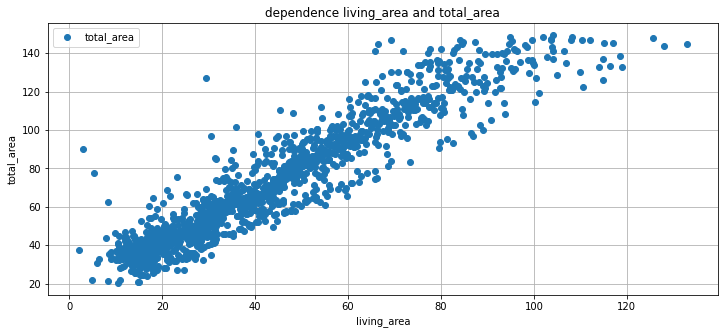

In [56]:
table_of_total_area(value='living_area', title='dependence living_area and total_area')

Можно заметить несколько выбросов по размерам общей площади и маленькой жилой площади в отношении соответственно. Чтобы эти данные не повлияли на итоговый результат, удалим их

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23117 entries, 0 to 23698
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23117 non-null  int64         
 1   last_price            23117 non-null  float64       
 2   total_area            23117 non-null  float64       
 3   first_day_exposition  23117 non-null  datetime64[ns]
 4   rooms                 23117 non-null  int64         
 5   ceiling_height        22989 non-null  float64       
 6   floors_total          23032 non-null  Int64         
 7   living_area           21713 non-null  float64       
 8   floor                 23117 non-null  int64         
 9   is_apartment          23117 non-null  bool          
 10  studio                23117 non-null  bool          
 11  open_plan             23117 non-null  bool          
 12  kitchen_area          21713 non-null  float64       
 13  balcony         

#### Площадь кухонь

Продолжим анализ площадей и посмотрим на площади кухонь

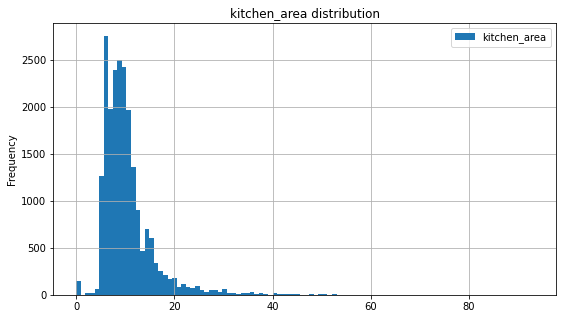

In [59]:
plot_hist(title='kitchen_area distribution', legend='kitchen_area')

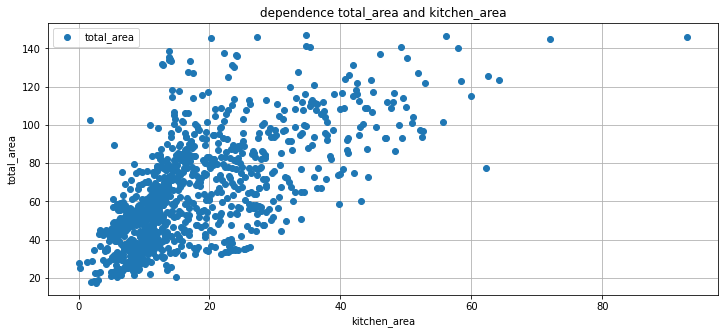

In [60]:
table_of_total_area(value='kitchen_area', title='dependence total_area and kitchen_area')

для анализа аномальных значений используем метод `boxplot` и `decribe`

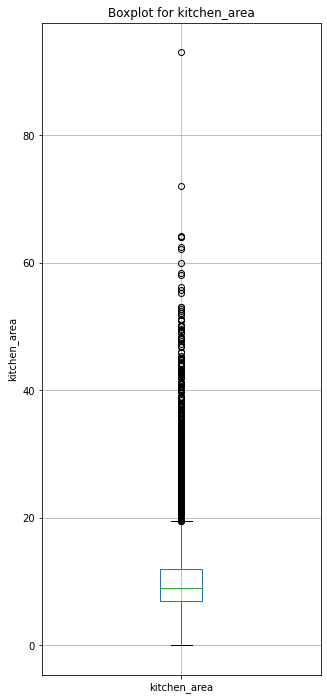

In [61]:
data['kitchen_area'].plot.box(figsize=(5, 12),
                              grid=True,
                              ylabel='kitchen_area', 
                              title='Boxplot for kitchen_area');

In [62]:
data['kitchen_area'].describe()

count    21713.000000
mean        10.383407
std          5.472126
min          0.000000
25%          7.000000
50%          9.000000
75%         12.000000
max         93.000000
Name: kitchen_area, dtype: float64

можно отметить выбивающиеся аномально большие значения кухонь с метражом больше 50 квадратных метров. Их и исключим из нашего датафрейма

In [63]:
data = data.query('kitchen_area < 50')

####  Количество комнат

Проанализируем количество комнат в квартире

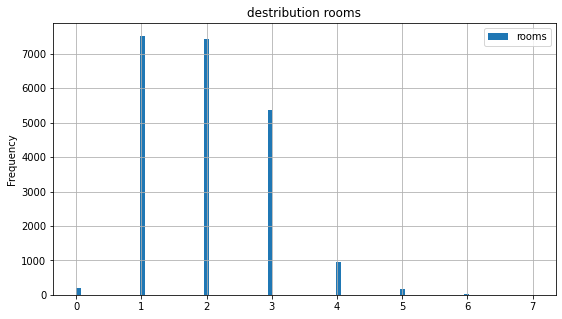

In [65]:
plot_hist(title='destribution rooms', legend='rooms', bins=50)

Рассмотрим детально, что за квартиры не имеют комнат

In [66]:
data[['total_area', 'price_mln', 'is_apartment', 'kitchen_area', 'living_area', 'studio', 'rooms']].query('rooms == 0')

,total_area,price_mln,is_apartment,kitchen_area,living_area,studio,rooms
144,27.00,2.45,True,0.0,15.50,True,0
349,25.00,2.32,True,8.0,17.00,False,0
440,27.11,2.48,True,0.0,24.75,True,0
508,34.40,3.38,True,10.1,24.30,False,0
608,25.00,1.85,True,0.0,25.00,True,0
...,...,...,...,...,...,...,...
23210,26.00,3.20,True,0.0,18.00,True,0
23442,27.70,2.50,True,9.7,18.00,False,0
23554,26.00,3.35,True,0.0,26.00,True,0
23592,29.00,1.45,True,11.0,18.00,False,0


Для квартир, которые помечены как студии можно заполнить значение комнат как 1. Для остальных квартир эти данные заполнить не представляется возможным.

In [67]:
data.loc[(data['studio']) & (data['rooms'] == 0), 'rooms'] = 1
data = data.query('rooms != 0')

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21628 entries, 0 to 23698
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21628 non-null  int64         
 1   last_price            21628 non-null  float64       
 2   total_area            21628 non-null  float64       
 3   first_day_exposition  21628 non-null  datetime64[ns]
 4   rooms                 21628 non-null  int64         
 5   ceiling_height        21525 non-null  float64       
 6   floors_total          21573 non-null  Int64         
 7   living_area           21628 non-null  float64       
 8   floor                 21628 non-null  int64         
 9   is_apartment          21628 non-null  bool          
 10  studio                21628 non-null  bool          
 11  open_plan             21628 non-null  bool          
 12  kitchen_area          21628 non-null  float64       
 13  balcony         

#### Высота потолков

Рассмотрим теперь параметр высоты потолков `ceiling_height`

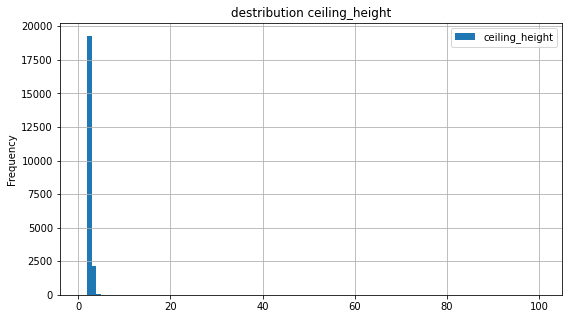

In [69]:
plot_hist(title='destribution ceiling_height', legend='ceiling_height', bins=10)

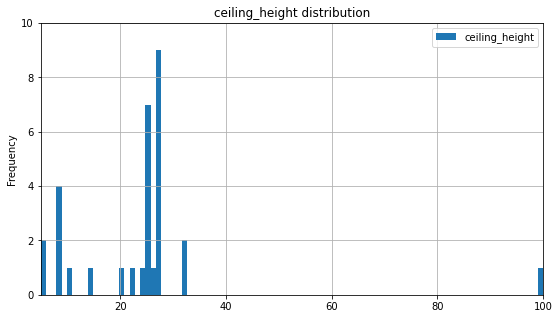

In [70]:
data['ceiling_height'].plot(kind='hist', 
                            bins=100, 
                            legend='ceiling_height', 
                            grid=True, 
                            title='ceiling_height distribution',
                            figsize=(9, 5),
                            xlim=(5, 100),
                            ylim=(0, 10)
                            );

Поскольку средняя высота потолков в квартирах 2.5 м, можно предположить, что в диапазоне от 20 до 40 метров произошла ошибка ввода данных и их нужно уменьшить в 10 раз

Однако данные с высотой потолков не входящих в диапазон до 5 метров и в (20, 40) сложно придумать нормальную интерпретацию, поэтому их лучше просто убрать

In [71]:
data.loc[(data['ceiling_height'] >= 20) & (data['ceiling_height'] <= 100), 'ceiling_height'] = data['ceiling_height'] / 10
data = data.query('ceiling_height < 10 | ceiling_height.isna()')

#### Общее количество этажей в доме

Рассмотрим общее количество этажей в доме `floors_total`

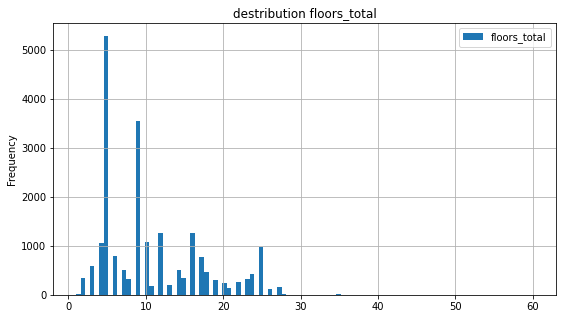

In [72]:
plot_hist(title='destribution floors_total', legend='floors_total', bins=50)

Количество этажей в жилых домах обычно не превышает 30, тем более в городе Санкт-Петербург, где в центре нельзя строить дома выше 5 этажей - это даже можно заметить по пику в районе 5 этажных домов. Рассмотрим детально квартиры с аномально высокими домами

In [73]:
data[['total_area', 'price_mln', 'is_apartment', 'kitchen_area', 
      'living_area', 'studio', 'rooms', 'local_name', 'floors_total', 'level', 'floor', 'cityCenters_nearest']].query('floors_total > 30')

,total_area,price_mln,is_apartment,kitchen_area,living_area,studio,rooms,local_name,floors_total,level,floor,cityCenters_nearest
397,54.0,5.99,True,18.70,21.4,False,2,Санкт-Петербург,36,другой,28,20444.0
871,75.0,7.78,True,11.70,40.5,False,2,Санкт-Петербург,35,другой,23,20444.0
1060,50.0,5.20,False,20.50,39.0,False,2,Санкт-Петербург,35,другой,15,20444.0
1697,28.0,3.55,True,10.00,18.0,False,1,Санкт-Петербург,34,другой,23,20444.0
1917,74.0,10.15,True,13.00,34.4,False,2,Санкт-Петербург,35,другой,30,20444.0
2253,45.5,3.80,True,7.40,27.4,False,2,Кронштадт,60,другой,4,49488.0
2966,37.0,4.30,True,10.40,14.0,False,1,Санкт-Петербург,35,другой,15,20444.0
4855,50.0,5.50,True,13.00,22.0,False,1,Санкт-Петербург,35,другой,4,20339.0
5807,80.0,8.15,True,12.00,41.0,False,2,Санкт-Петербург,36,другой,13,20444.0
5808,43.0,4.59,True,15.00,14.0,False,1,Санкт-Петербург,35,другой,11,20444.0


Отметим, что для квартир с отдинаковым параметром `cityCenters_nearest` существуют разные количества этажей, а так же многоэтажки выше 40 этажей. Предположительно для данных с этажами 36, 37 при заполнении могли учитывать подземные этажи. Поэтому значения с `cityCenters_nearest` = 20444.0 изменим на более растространенное `floors_total` = 35. Многоэтажки выше этих значений уберем.

In [74]:
data['floors_total'].loc[(data['floors_total'] == 36) | (data['floors_total'] == 37)] = 35

In [75]:
data = data.query('floors_total <= 35 | floors_total.isna()')

#### Расстояние до центра города в метрах

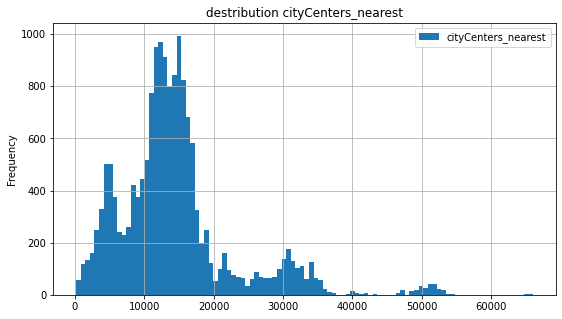

In [76]:
plot_hist(title='destribution cityCenters_nearest', legend='cityCenters_nearest')

На графике явно видно 4 пика, а так же некоторое количество квартир, находящихся на отдалении от центра города, вероятно находящихся в области. Рассмотрим поближе полученные данные. Для этого построем сводную таблицу уникальных названий населенных пунктов `local_name` от медианного значения `city_center_km` и посчитаем количество записей. Поскольку у нас данные по квартирам в Санкт-Петербурге, то уберем его, для оценки дальности населенных пунктов и количества объявлений в них.

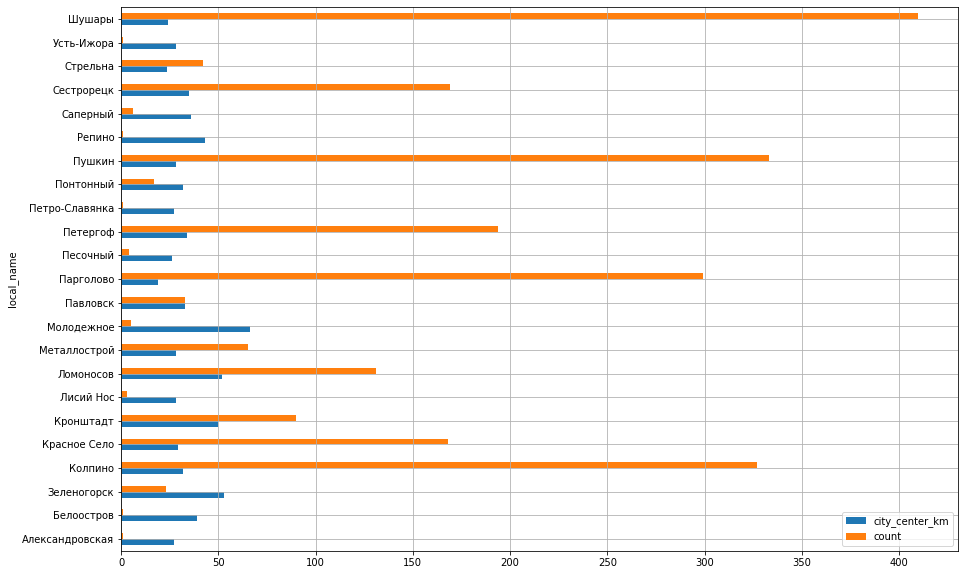

In [77]:
data_pivot = data.pivot_table(index='local_name', values='city_center_km', aggfunc='median')
data_pivot['count'] = data.groupby('local_name').size()
data_pivot.query('local_name != "Санкт-Петербург"').plot(grid=True, figsize=(15, 10), kind='barh');

In [78]:
data_pivot.sort_values(by='city_center_km', ascending=False)

,city_center_km,count
local_name,,
Молодежное,66.0,5
Зеленогорск,53.0,23
Ломоносов,52.0,131
Кронштадт,50.0,90
Репино,43.0,1
Белоостров,39.0,1
Саперный,36.0,6
Сестрорецк,35.0,169
Петергоф,34.0,194


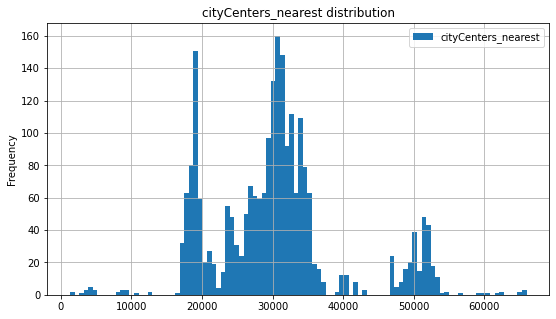

In [79]:
data.query('local_name != "Санкт-Петербург"')['cityCenters_nearest'].plot(kind='hist',
                                                                          bins=100,
                                                                          legend='cityCenters_nearest',
                                                                          grid=True,
                                                                          title='cityCenters_nearest distribution',
                                                                          figsize=(9, 5)
                                                                         );

Теперь отчетливо видно, что за данные пики в районе 50 км -  Зеленогорск, Крондштат и Ломоносов. Пик до 20 км - Парголово, а 30 км - остальные поселки городского типа, находящиеся на удалении от центра города, где большой вклад вносит Колпино, Красное село, Петергоф и Сестрорецк. Данные выглядят вполне закономерно, можно убрать только данные находящиеся около 60 км

In [80]:
data = data.query('cityCenters_nearest < 58000 | cityCenters_nearest.isna()')

Рассмотрим так же данные, которые находятся в пределах 10 км, но `local_name` != "Санкт-Петербург"

In [81]:
data.query('local_name != "Санкт-Петербург" & cityCenters_nearest < 10000')['local_name']

1097     NaN
3574     NaN
4151     NaN
4189     NaN
5343     NaN
7114     NaN
7330     NaN
9821     NaN
10122    NaN
11248    NaN
12936    NaN
15686    NaN
15866    NaN
16561    NaN
16610    NaN
18526    NaN
18917    NaN
19045    NaN
20057    NaN
20654    NaN
21333    NaN
22474    NaN
Name: local_name, dtype: object

Эти апартаменты явно находятся в черте города, поэтому заполним пропуски на "Санкт-Петербург"

In [82]:
data['local_name'].loc[(data['local_name'] != "Санкт-Петербург") & (data['cityCenters_nearest'] < 10000)] = "Санкт-Петербург"

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21612 entries, 0 to 23698
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21612 non-null  int64         
 1   last_price            21612 non-null  float64       
 2   total_area            21612 non-null  float64       
 3   first_day_exposition  21612 non-null  datetime64[ns]
 4   rooms                 21612 non-null  int64         
 5   ceiling_height        21509 non-null  float64       
 6   floors_total          21557 non-null  Int64         
 7   living_area           21612 non-null  float64       
 8   floor                 21612 non-null  int64         
 9   is_apartment          21612 non-null  bool          
 10  studio                21612 non-null  bool          
 11  open_plan             21612 non-null  bool          
 12  kitchen_area          21612 non-null  float64       
 13  balcony         

#### Расстояние до ближайшего парка

Рассмотрим распределение расстояний до ближайшего парка и поскольку мы заполнили нулями расстояние при которых нет ближайшего парка, уберем это значение из выборки

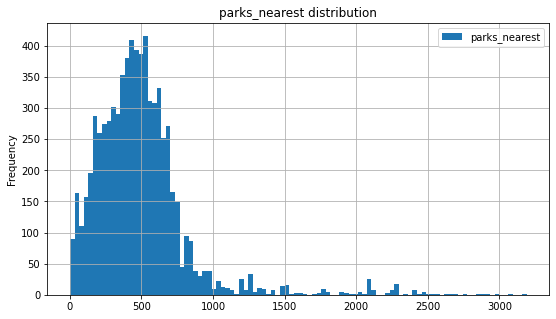

In [84]:
data['parks_nearest'].loc[data['parks_nearest'] != 0].plot(kind='hist', 
                                                          bins=100, 
                                                          legend='parks_nearest', 
                                                          grid=True, 
                                                          title='parks_nearest distribution',
                                                          figsize=(9, 5)
                                                          );

На гистограмме видно единичные случаи парков, находящихся за пределами 2500 метров. Так же есть выбивающиеся значения. где расстояние больше трехсот метров, хотя данный параметр не должен содержать таких значений. Обрежем этот диапазон.

In [85]:
data = data.query('parks_nearest < 2500 | parks_nearest.isna()')

#### Тип этажа квартиры

Рассмотрим данные о том, на каком этаже находится квартира

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

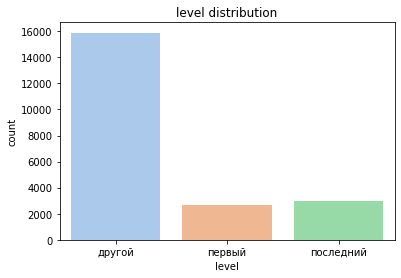

<Figure size 360x648 with 0 Axes>

In [87]:
sns.countplot(x=data['level'], palette='pastel')
plt.title('level distribution')
plt.figure(figsize=(5, 9))
plt.show()

Данные выглядят вполне логично - большее количество квартир находится между первым и последним этажом, поскольку это диапазон, в который попадает большее количество значений, чем отдельные точки на отрезке

#### Цена объекта

Рассмотрим данные о ценах на квартиры

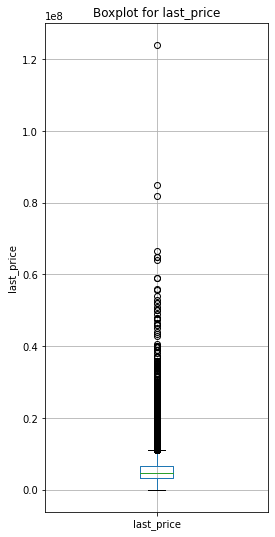

In [88]:
data['last_price'].plot.box(figsize=(4, 9),
                            grid=True,
                            ylabel='last_price', 
                            title='Boxplot for last_price');

In [89]:
data['last_price'].describe()

count    2.159700e+04
mean     5.681726e+06
std      4.361101e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.600000e+06
75%      6.507813e+06
max      1.240000e+08
Name: last_price, dtype: float64

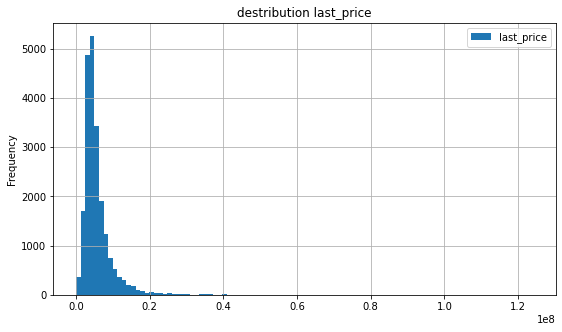

In [90]:
plot_hist(title='destribution last_price', legend='last_price', bins=50)

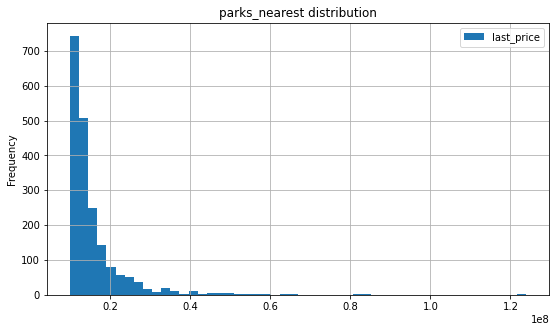

In [91]:
data['last_price'].loc[data['last_price'] > 10 ** 7].plot(kind='hist', 
                                                          bins=50, 
                                                          legend='parks_nearest', 
                                                          grid=True, 
                                                          title='parks_nearest distribution',
                                                          figsize=(9, 5)
                                                          );

Поскольку количество квартир, которые превышают 20 миллионов единичное количество, обрежем данные, которые превышают три миллиона -тем самым мы сохраним распределение Пуассона, которое уходит в ноль, одако сохраним зависимость

In [92]:
data = data.query('last_price < 2 * 10 ** 7')

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21298 entries, 0 to 23698
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21298 non-null  int64         
 1   last_price            21298 non-null  float64       
 2   total_area            21298 non-null  float64       
 3   first_day_exposition  21298 non-null  datetime64[ns]
 4   rooms                 21298 non-null  int64         
 5   ceiling_height        21195 non-null  float64       
 6   floors_total          21244 non-null  Int64         
 7   living_area           21298 non-null  float64       
 8   floor                 21298 non-null  int64         
 9   is_apartment          21298 non-null  bool          
 10  studio                21298 non-null  bool          
 11  open_plan             21298 non-null  bool          
 12  kitchen_area          21298 non-null  float64       
 13  balcony         

#### Дата размещения

Изучите, как быстро продавались квартиры (столбец `days_exposition`). Этот параметр показывает, сколько дней было размещено каждое объявление.
- Постройте гистограмму.
- Посчитайте среднее и медиану.
- В ячейке типа `markdown` опишите, сколько времени обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?

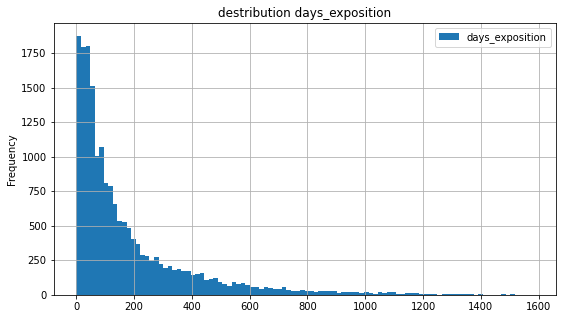

In [94]:
plot_hist(title='destribution days_exposition', legend='days_exposition')

In [95]:
data = data.query('days_exposition < 1400 | days_exposition.isna()')

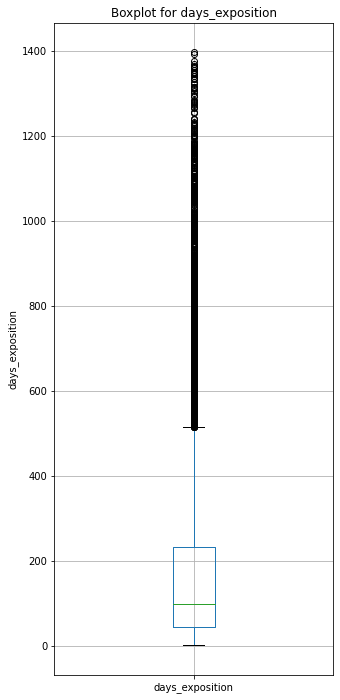

In [97]:
data['days_exposition'].plot.box(figsize=(5, 12),
                              grid=True,
                              ylabel='days_exposition', 
                              title='Boxplot for days_exposition');

In [98]:
data['days_exposition'].describe()

count    18446.000000
mean       180.144259
std        214.668423
min          1.000000
25%         44.000000
50%         98.000000
75%        232.000000
max       1396.000000
Name: days_exposition, dtype: float64

In [99]:
data['days_exposition'].loc[data['days_exposition'] > 450].count() / data['days_exposition'].count() * 100

10.19733275506885

Вывод:
В среднем для продажи квартиры необходимо около ста дней. В основном квартиры продаются за время 40-230 дней, самая минимальная продажа составляет за один день, срок менее 40 дней - это быстрая продажа. При сроке продажи более 230 дней продажу можно считать долгой, однако при продаже более 450 дней объявление находится необычайно долго на продаже. Последний тип объявлений занимает 10 процентов от количества всех объявлений.

In [100]:
def table_of_corr(value, title):
    data.pivot_table(index=value, values='last_price').plot(grid=True,
                                                            figsize=(12, 5),
                                                            style='o',
                                                            title=title, 
                                                            ylabel='last_price')

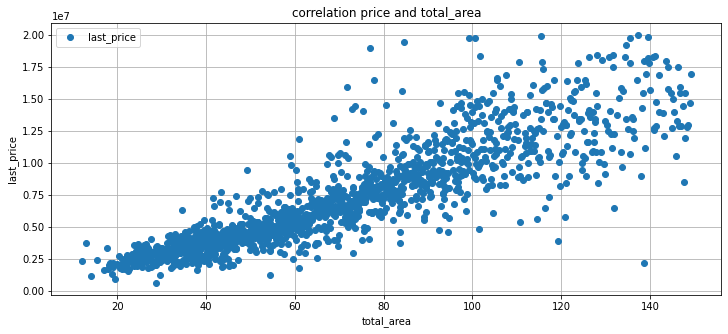

In [101]:
table_of_corr(value='total_area', title='correlation price and total_area')

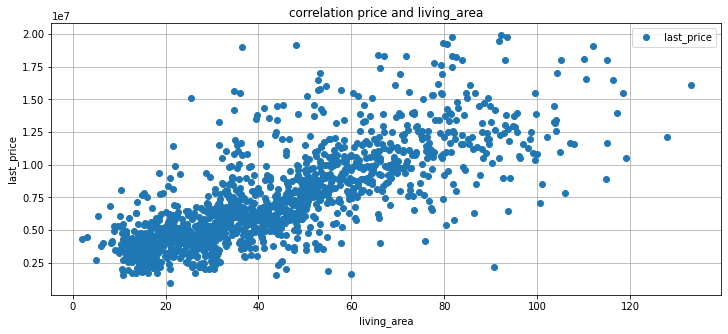

In [102]:
table_of_corr(value='living_area', title='correlation price and living_area')

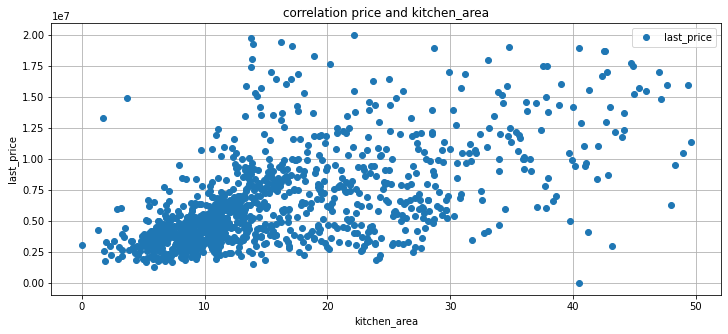

In [103]:
table_of_corr(value='kitchen_area', title='correlation price and kitchen_area')

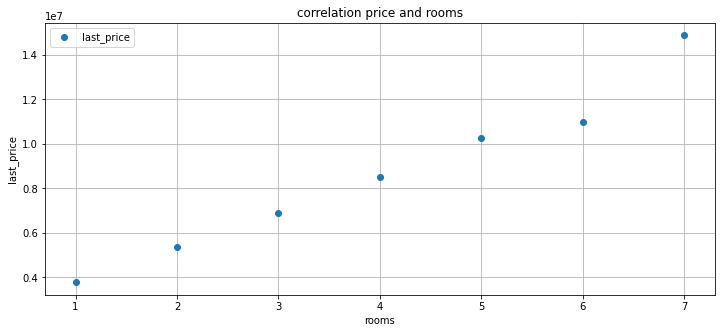

In [104]:
table_of_corr(value='rooms', title='correlation price and rooms')

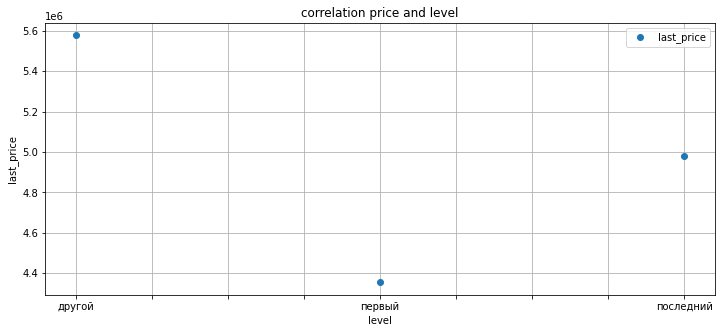

In [105]:
table_of_corr(value='level', title='correlation price and level')

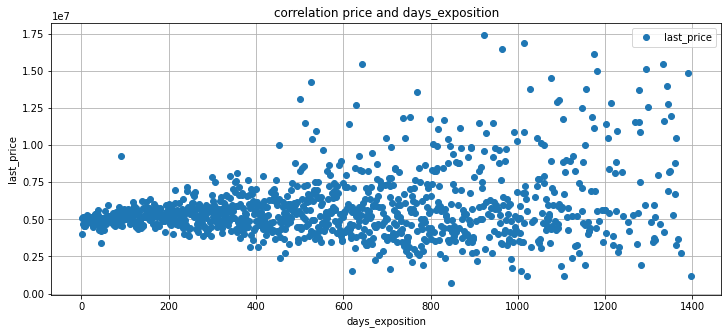

In [106]:
table_of_corr(value='days_exposition', title='correlation price and days_exposition')

In [107]:
data[['days_exposition', 'level', 'rooms', 'kitchen_area', 'living_area', 'total_area', 'last_price']].corr()

,days_exposition,rooms,kitchen_area,living_area,total_area,last_price
days_exposition,1.000000,0.102846,0.079184,0.125136,0.142794,0.106927
rooms,0.102846,1.000000,0.135555,0.873385,0.798935,0.480290
kitchen_area,0.079184,0.135555,1.000000,0.237069,0.478661,0.522474
living_area,0.125136,0.873385,0.237069,1.000000,0.912438,0.633647
total_area,0.142794,0.798935,0.478661,0.912438,1.000000,0.761947
last_price,0.106927,0.480290,0.522474,0.633647,0.761947,1.000000


Можно отметить, что наибольшая зависимость цены зависит от общей площади квартиры, далее наблюдается не такая сильная зависимость от жилой площади и площадь кухонь. С увеличением количества комнат цена так же растет, но зависимость проявляется не так ярко, как в предыдущих случаях.

Для времени выставления квартиры не было выявлено зависимости от цены, коэффициент корреляции Пирсона стремится к нулю и логичено предположить, что нет прямой зависимости цены от дней выставления объявления.

Судя по графику зависимости этажа от цены не наблюдается зависимости, поскольку квартир, находящихся в диапазоне между первым и последним этажом просто напросто больше, поэтому сложно сказать о корреляции данных признаков.

#### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [108]:
top_cities = data['local_name'].value_counts().sort_values(ascending=False)[:10].index.tolist()
top_cities_data = data[data['local_name'].isin(top_cities)][['last_price', 'total_area', 'local_name']]
top_cities_data['price_area'] = top_cities_data['last_price'] / top_cities_data['total_area']

In [109]:
mean_cities_data = round(top_cities_data.groupby('local_name')['price_area'].mean().sort_values(ascending=False), 2)

In [110]:
mean_cities_data

local_name
Санкт-Петербург    108575.94
Пушкин             102362.48
Кудрово             95661.90
Парголово           90321.46
Мурино              86443.75
Шушары              78887.87
Колпино             75249.78
Гатчина             68684.40
Всеволожск          67381.82
Выборг              58166.91
Name: price_area, dtype: float64

На основании этого можно сделать вывод, что самые дорогие населенные пункты это Пушкин и Санкт-Петербург, а так же Кудрово и Парголово, тогда как самые бюджетные это Гатчина и Всеволожск.

#### Выделим квартиры в Санкт-Петербурге с помощью столбца local_name и вычислим их среднюю стоимость на разном удалении от центра

In [111]:
data_price_km = round(data[['last_price', 'city_center_km']]
                      .loc[data['local_name'] == 'Санкт-Петербург']
                      .pivot_table(index='city_center_km', values='last_price', aggfunc=['mean', 'median'])
                      .div(10 ** 6)
                      .rename(columns={'last_price': 'last_price_mln'}), 3
                     )
data_price_km

,mean,median
,last_price_mln,last_price_mln
city_center_km,,
0,9.362,9.590
1,10.284,9.555
2,9.663,9.000
3,8.586,8.000
4,9.062,8.400
5,8.987,8.200
6,8.280,7.620
7,7.807,6.725


<AxesSubplot:xlabel='city_center_km', ylabel='price_mln'>

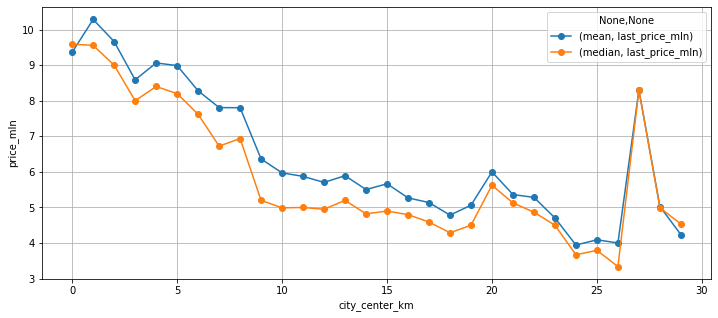

In [112]:
data_price_km.plot(grid=True, figsize=(12, 5), style='o-', ylabel='price_mln')

Стоимость объекта от расстояния от центра является убывающей зависимостью, в диапазоне до 25 км это четко можно заметить. Однако на промежутке от 25 до 30 км заметны пики повышения цены - на этом сказывается меньшее количество предложений, в результате чего мы получаем выбросы с повышением цены.

Оценивая график вместе с графиком медианных значений, мы понимаем, что в этом виновата маленькая выборка объявлений на определенных километрах, которые существенно вляют на наши медианные и средние значения

### Общий вывод

Для полученнного датасета была проведена предобработка данных - заполнение возможных пропусков значениями, удаление дубликатов, создание столбца уникальным имен для населенных пунктов, столбца для уровня квартиры относительно здания, цена одного квадратного метра, расстояние до города в километрах 

Был проведен анализ корреляции цены квартиры от различных признаков, таких как общая площадь, жилая площадь, площадь кухни, количество комнат, тип этажа, на котором расположена квартира (первый, последний, другой), дата размещения (день недели, месяц, год). Наиболее сильная зависимость выявлена для общей и жилой площади, площади кухни, расположенных соответственно в порядке убывания силы. Так же была найдена более слабая зависимость цены от количества комнат.

Немаловажную роль так же играет отдаление от центра - на примере города Санкт-Петербург видно, что в пределах определенного диапазона цена практически монотонно уменьшается с каждым километром.

В ходе анализа не была найдена зависимость между признаками уровень этажа и сколько дней было размещено объявление, поэтому логично предположить, что эти параметры не зависят друг от друга.



Выполнено задание «Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений»: на основании результатов было выяснено, что самые дорогие населенные пункты это Пушкин и Санкт-Петербург, а так же Кудрово и Парголово, тогда как самые бюджетные это Гатчина и Всеволожск.

Так же был сделан вывод о продолжительности продаж квартир:

В среднем для продажи квартиры необходимо около ста дней. В основном квартиры продаются за время 40-230 дней, самая минимальная продажа составляет за один день, срок менее 40 дней - это быстрая продажа. При сроке продажи более 230 дней продажу можно считать долгой, однако при продаже более 450 дней объявление находится необычайно долго на продаже. Последний тип объявлений занимает 10 процентов от количества всех объявлений.